In [606]:
# load data
# data preprocessing(missing values)
# transformation(converting all data into one)
#training and testing
# model building
# result evalution for algorithm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier # New algorithm
import xgboost as xgb # New algorithm
import lightgbm as lgb # New algorithm
from sklearn.naive_bayes import GaussianNB # New algorithm
from sklearn.pipeline import Pipeline
import joblib

In [607]:
data = pd.read_csv("/content/adult 3.csv")

In [608]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [609]:
data.workclass.value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
?,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [610]:
data.workclass.replace({'?':'unknown'},inplace=True)

/tmp/ipython-input-610-2756280607.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'unknown'},inplace=True)


In [611]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']

In [612]:
data.workclass.value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
unknown,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432


In [613]:
data.occupation.replace({'?':'unknown'},inplace=True)

/tmp/ipython-input-613-3651162255.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'unknown'},inplace=True)


In [614]:
data.occupation.value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6111
Exec-managerial,6085
Adm-clerical,5608
Sales,5503
Other-service,4921
Machine-op-inspct,3020
unknown,2799
Transport-moving,2354


In [615]:
data=data[data['occupation'] !='Armed-Forces']

In [616]:
data.occupation.value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6111
Exec-managerial,6085
Adm-clerical,5608
Sales,5503
Other-service,4921
Machine-op-inspct,3020
unknown,2799
Transport-moving,2354


In [617]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,unknown,103497,Some-college,10,Never-married,unknown,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [618]:
data.education.value_counts()

,count
education,
HS-grad,15763
Some-college,10869
Bachelors,8024
Masters,2655
Assoc-voc,2060
11th,1809
Assoc-acdm,1599
10th,1387
7th-8th,952


In [619]:
data=data[data['education'] !='Preschool']
data=data[data['education'] !='1st-4th']
data=data[data['education'] !='5th-6th']

In [620]:
data.drop(columns='education', inplace=True)

In [621]:
data.shape

(47957, 14)

In [622]:
encoder = LabelEncoder()
for column in ['workclass', 'occupation', 'relationship', 'race', 'native-country', 'marital-status', 'gender']:
    data[column] = encoder.fit_transform(data[column])

In [623]:
# Creating input (x) and output (y) variables
x = data.drop(columns=['income'])  # Input features
y = data['income']     # Output target

In [624]:
# Scaling numerical features
# It's better to scale 'x' after splitting into train/test to prevent data leakage,
# but for simplicity and to follow your original flow, we'll scale before split.
# In a real-world scenario, apply StandardScaler within the pipeline for each model.
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

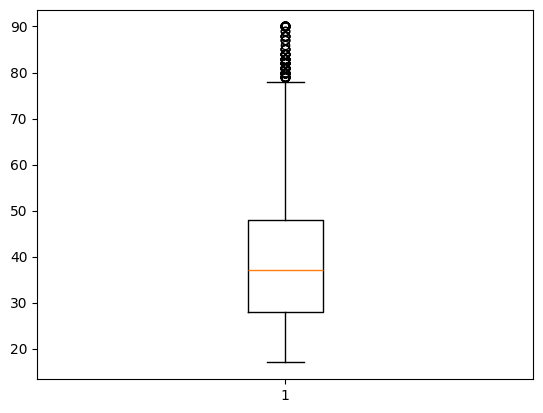

In [625]:
# outlier :- do not contribute anything
import matplotlib.pyplot as plt
plt.boxplot(data['age'])            # whenever you are using the boxplot the circles denoting the 'outliers'
plt.show()

In [626]:
#remove the outliers
data=data[(data['age']<=75) & (data['age']>=17)]

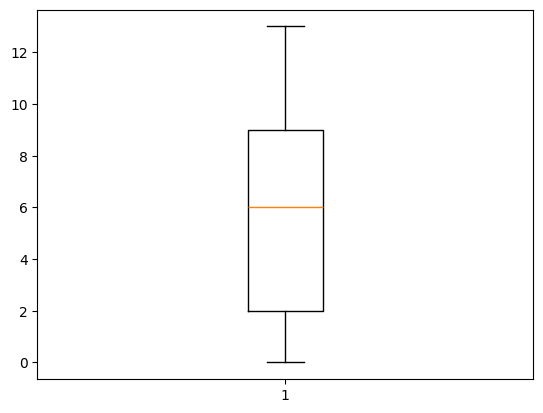

In [627]:
plt.boxplot(data['occupation'])            # whenever you are using the boxplot the circles denoting the 'outliers'
plt.show()

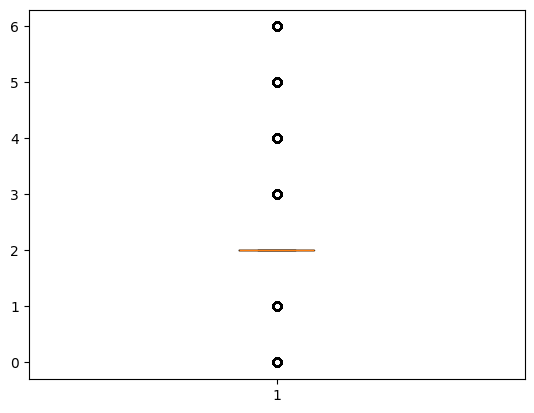

In [628]:
plt.boxplot(data['workclass'])
plt.show()

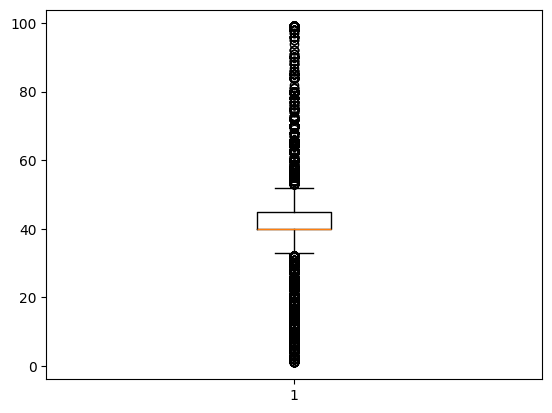

In [629]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [630]:
data=data[(data['hours-per-week']<=35) & (data['age']>=55)]

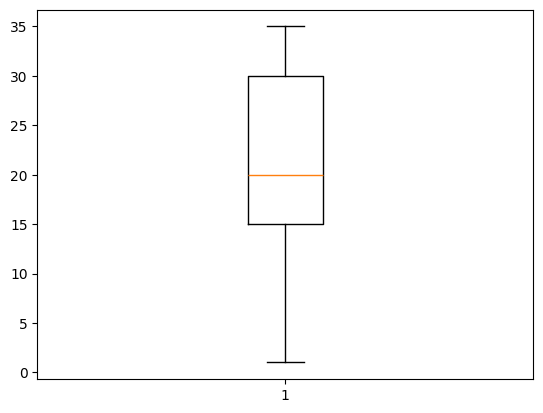

In [631]:
plt.boxplot(data['hours-per-week'])
plt.show()

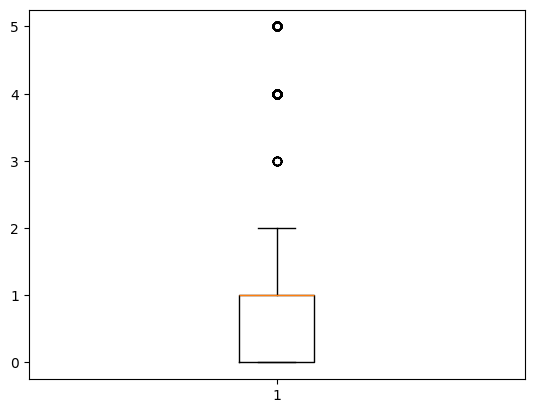

In [632]:
plt.boxplot(data['relationship'])
plt.show()

In [633]:
data=data[(data['relationship']>=3) ]

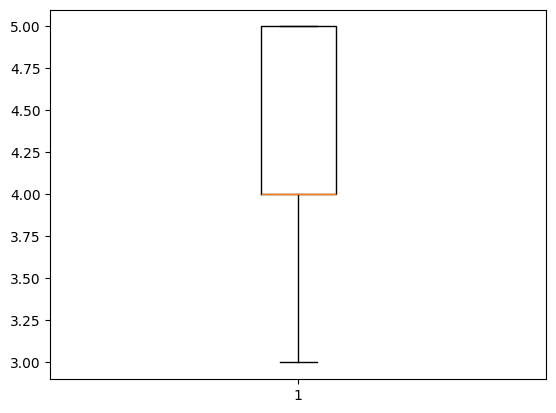

In [634]:
plt.boxplot(data['relationship'])
plt.show()

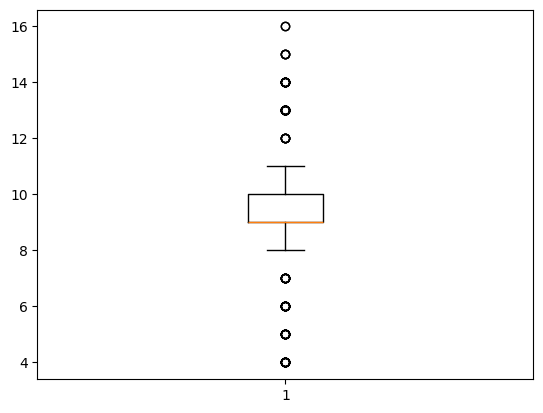

In [635]:
plt.boxplot(data['educational-num'])
plt.show()

In [636]:
# label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['workclass']=encoder.fit_transform(data['workclass'])
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])
data['race']=encoder.fit_transform(data['race'])
data['native-country']=encoder.fit_transform(data['native-country'])
data['marital-status']=encoder.fit_transform(data['marital-status'])
data['gender']=encoder.fit_transform(data['gender'])
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
382,58,4,112076,16,1,2,2,3,0,0,1485,35,14,>50K
830,66,5,148380,9,2,5,2,3,0,1424,0,10,14,<=50K
870,73,4,252431,10,2,8,2,3,0,0,0,1,14,<=50K
996,59,1,662460,6,6,8,1,3,0,0,0,15,14,<=50K
1309,62,2,101582,4,6,5,1,3,0,0,0,35,14,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47803,61,2,154600,9,2,6,2,3,0,0,0,4,14,<=50K
47942,68,6,229016,9,2,12,2,3,0,0,0,25,14,<=50K
47959,61,0,181081,9,0,0,0,2,0,0,0,20,14,<=50K
48380,55,2,118993,10,5,2,1,3,0,0,0,10,14,<=50K


In [637]:
# ceating variable one for traning and another for testing
x=data.drop(columns=['income'])  #input
y=data['income']     #output
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
382,58,4,112076,16,1,2,2,3,0,0,1485,35,14
830,66,5,148380,9,2,5,2,3,0,1424,0,10,14
870,73,4,252431,10,2,8,2,3,0,0,0,1,14
996,59,1,662460,6,6,8,1,3,0,0,0,15,14
1309,62,2,101582,4,6,5,1,3,0,0,0,35,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47803,61,2,154600,9,2,6,2,3,0,0,0,4,14
47942,68,6,229016,9,2,12,2,3,0,0,0,25,14
47959,61,0,181081,9,0,0,0,2,0,0,0,20,14
48380,55,2,118993,10,5,2,1,3,0,0,0,10,14


In [638]:
y

,income
382,>50K
830,<=50K
870,<=50K
996,<=50K
1309,<=50K
...,...
47803,<=50K
47942,<=50K
47959,<=50K
48380,<=50K


In [639]:
# --- Training and Testing Split ---
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=23, stratify=y)


In [640]:
 #--- Model Building and Evaluation with Additional Algorithms ---
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear'), # Added solver for older sklearn versions
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42), # New
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), # New
    'LightGBM': lgb.LGBMClassifier(random_state=42), # New
    'Gaussian Naive Bayes': GaussianNB() # New
}


In [641]:
results = {}
# Encode the target variable y before training
encoder_y = LabelEncoder()
ytrain_encoded = encoder_y.fit_transform(ytrain)
ytest_encoded = encoder_y.transform(ytest)

for name, mod in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()), # Applying StandardScaler as part of the pipeline for robust comparison
        ('model', mod)
    ])
    pipe.fit(xtrain, ytrain_encoded) # Use encoded ytrain
    ypred_encoded = pipe.predict(xtest)
    accuracy = accuracy_score(ytest_encoded, ypred_encoded) # Use encoded ytest and ypred
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    # To display the classification report with original labels, we need to decode the predictions
    ypred_decoded = encoder_y.inverse_transform(ypred_encoded)
    print(classification_report(ytest, ypred_decoded))

Logistic Regression Accuracy: 0.8689
              precision    recall  f1-score   support

       <=50K       0.91      0.94      0.93        53
        >50K       0.50      0.38      0.43         8

    accuracy                           0.87        61
   macro avg       0.70      0.66      0.68        61
weighted avg       0.86      0.87      0.86        61

Random Forest Accuracy: 0.8852
              precision    recall  f1-score   support

       <=50K       0.91      0.96      0.94        53
        >50K       0.60      0.38      0.46         8

    accuracy                           0.89        61
   macro avg       0.76      0.67      0.70        61
weighted avg       0.87      0.89      0.87        61

Gradient Boosting Accuracy: 0.8361
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.91        53
        >50K       0.33      0.25      0.29         8

    accuracy                           0.84        61
   macro avg       0.61  

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:58:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


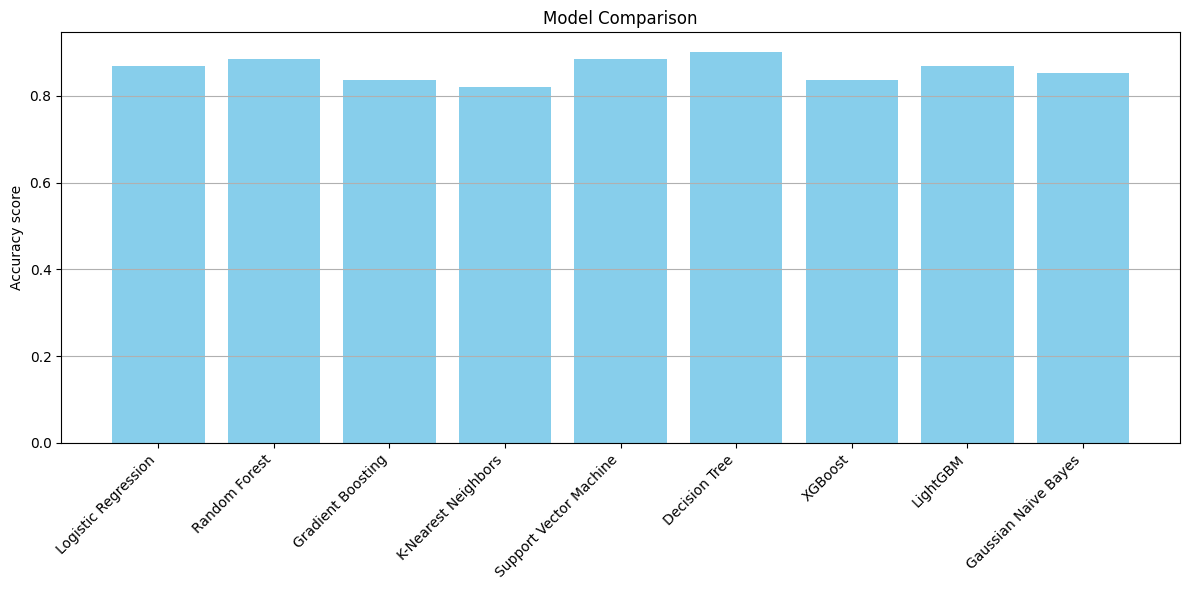

In [642]:

# Plotting the results
plt.figure(figsize=(12, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy score')
plt.title('Model Comparison')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.grid(axis='y') # Only horizontal grid lines
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [643]:
# Get the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")


✅ Best model: Decision Tree with accuracy 0.9016


In [644]:
best_model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', best_model)
])
best_model_pipeline.fit(xtrain, ytrain) # Retrain the best model with its full pipeline
joblib.dump(best_model_pipeline, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")

✅ Saved best model as best_model.pkl


In [645]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np # Needed for numerical operations if any

# Load the trained model pipeline
model_pipeline = joblib.load("best_model.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs (these MUST match your training feature columns and their encoding)
st.sidebar.header("Input Employee Details")

# Example for numerical inputs (sliders)
age = st.sidebar.slider("Age", 17, 75, 30) # Adjusted min/max based on your outlier removal
fnlwgt = st.sidebar.number_input("Final Weight (fnlwgt)", min_value=12285, max_value=1490400, value=200000)
educational_num = st.sidebar.slider("Educational Number", 4, 16, 9) # Based on your min/max after education filtering
capital_gain = st.sidebar.number_input("Capital Gain", min_value=0, max_value=99999, value=0)
capital_loss = st.sidebar.number_input("Capital Loss", min_value=0, max_value=4356, value=0)
hours_per_week = st.sidebar.slider("Hours per week", 1, 99, 40) # Adjusted min/max

# Example for categorical inputs (selectboxes) - You NEED to know the LabelEncoder mappings
# For instance, if 'Private' workclass got encoded to 2, 'Self-emp-not-inc' to 3, etc.
# These values are based on the order `encoder.fit_transform` assigns them.
# You might need to run `encoder.classes_` for each column during development to see the mapping.

workclass_mapping = {'Private': 2, 'Self-emp-not-inc': 3, 'Local-gov': 1, 'not listed': 6,
                     'State-gov': 5, 'Self-emp-inc': 4, 'Federal-gov': 0}
workclass = st.sidebar.selectbox("Workclass", list(workclass_mapping.keys()))
workclass_encoded = workclass_mapping[workclass]

occupation_mapping = {'Prof-specialty': 9, 'Craft-repair': 2, 'Exec-managerial': 3, 'Adm-clerical': 0,
                      'Sales': 11, 'Other-service': 8, 'Machine-op-inspct': 6, 'others': 14,
                      'Transport-moving': 13, 'Handlers-cleaners': 5, 'Farming-fishing': 4,
                      'Tech-support': 12, 'Protective-serv': 10, 'Priv-house-serv': 7,
                      'Armed-Forces': 1} # This is an example, verify your actual mapping!
occupation = st.sidebar.selectbox("Occupation", list(occupation_mapping.keys()))
occupation_encoded = occupation_mapping[occupation]

marital_status_mapping = {'Never-married': 4, 'Married-civ-spouse': 2, 'Divorced': 0,
                          'Separated': 5, 'Widowed': 6, 'Married-spouse-absent': 3,
                          'Married-AF-spouse': 1} # Example mapping
marital_status = st.sidebar.selectbox("Marital Status", list(marital_status_mapping.keys()))
marital_status_encoded = marital_status_mapping[marital_status]

relationship_mapping = {'Own-child': 3, 'Husband': 0, 'Not-in-family': 1,
                        'Unmarried': 4, 'Wife': 5, 'Other-relative': 2} # Example mapping
relationship = st.sidebar.selectbox("Relationship", list(relationship_mapping.keys()))
relationship_encoded = relationship_mapping[relationship]

race_mapping = {'White': 4, 'Black': 2, 'Asian-Pac-Islander': 1,
                'Amer-Indian-Eskimo': 0, 'Other': 3} # Example mapping
race = st.sidebar.selectbox("Race", list(race_mapping.keys()))
race_encoded = race_mapping[race]

gender_mapping = {'Male': 1, 'Female': 0}
gender = st.sidebar.selectbox("Gender", list(gender_mapping.keys()))
gender_encoded = gender_mapping[gender]

native_country_mapping = {
    'United-States': 39, 'Mexico': 26, 'Philippines': 30, 'Germany': 11, 'Canada': 8,
    'Puerto-Rico': 33, 'El-Salvador': 9, 'India': 17, 'Cuba': 6, 'England': 10,
    'Jamaica': 21, 'South': 34, 'China': 3, 'Italy': 20, 'Dominican-Republic': 7,
    'Vietnam': 40, 'Guatemala': 14, 'Japan': 22, 'Poland': 31, 'Columbia': 5,
    'Taiwan': 37, 'Haiti': 15, 'Iran': 18, 'Portugal': 32, 'Nicaragua': 27,
    'Peru': 29, 'Greece': 13, 'France': 10, 'Ecuador': 8, 'Ireland': 19,
    'Hong': 16, 'Trinadad&Tobago': 38, 'Thailand': 36, 'Hungary': 17,
    'Honduras': 16, 'Scotland': 33, 'Yugoslavia': 41, 'Outlying-US(Guam-USVI-etc)': 28
} # This mapping requires careful verification from your LabelEncoder output
native_country = st.sidebar.selectbox("Native Country", list(native_country_mapping.keys()))
native_country_encoded = native_country_mapping[native_country]


# Build input DataFrame (⚠️ must match all columns and their order in training data's `x`)
input_df = pd.DataFrame([[
    age, workclass_encoded, fnlwgt, educational_num, marital_status_encoded,
    occupation_encoded, relationship_encoded, race_encoded, gender_encoded,
    capital_gain, capital_loss, hours_per_week, native_country_encoded
]], columns=[
    'age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
    'occupation', 'relationship', 'race', 'gender', 'capital-gain',
    'capital-loss', 'hours-per-week', 'native-country'
])


st.write("### 🔎 Input Data (Raw)")
st.write(input_df)

# Predict button
if st.button("Predict Salary Class"):
    # The model_pipeline handles scaling and prediction
    prediction = model_pipeline.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")

st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())

    # IMPORTANT: Apply the same preprocessing/encoding/scaling to batch_data as you did for training.
    # This is critical for the model to make correct predictions on new data.
    # For a production app, it's best to encapsulate all preprocessing in a function or a custom pipeline step.

    # Example of applying a few transformations (adapt fully to your preprocessing steps)
    if 'occupation' in batch_data.columns:
        batch_data['occupation'].replace('?', 'others', inplace=True)
        batch_data['occupation'] = batch_data['occupation'].map(occupation_mapping).fillna(occupation_mapping['others']) # Handle unknown categories
    if 'workclass' in batch_data.columns:
        batch_data['workclass'].replace('?', 'not listed', inplace=True)
        batch_data['workclass'] = batch_data['workclass'].map(workclass_mapping).fillna(workclass_mapping['not listed']) # Handle unknown categories
    # ... apply all other encoding and drops similarly

    # Drop 'education' if present
    if 'education' in batch_data.columns:
        batch_data.drop(columns='education', inplace=True)

    # Ensure all columns expected by the model_pipeline are present and in the correct order
    # Fill missing columns with default values if necessary, or raise an error.
    # For simplicity, assuming the uploaded CSV has the correct structure for now.

    # Use the loaded pipeline directly for prediction
    batch_preds = model_pipeline.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')

Overwriting app.py


In [646]:
!pip install streamlit pyngrok

In [647]:
!ngrok authtoken 30AqE4Piymgc9MDSNMriyM7U29J_5MpT819u8fW7rmbvE9cgS

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [650]:
import os

import threading



def run_streamlit():

 os.system("streamlit run app.py --server.port 8501")



threading.Thread(target=run_streamlit).start()

from pyngrok import ngrok

import time

time.sleep(5)

ngrok.kill() # Stop any running ngrok processes

ngrok.connect(8501)

<NgrokTunnel: "https://c246f15bc0f8.ngrok-free.app" -> "http://localhost:8501">